<a href="https://colab.research.google.com/github/benitez-hue/DataSetsMarketing-BancarioBenitezMar-aLaura/blob/main/BenitezMaria_Laura_ProyectoFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
from IPython.display import HTML

# HTML con colores pastel
html_code = """
<style>
  .encabezado {
    background: linear-gradient(to right, #d1f3f3, #fef6e4);
    padding: 30px;
    border-radius: 20px;
    text-align: center;
    font-family: 'Segoe UI', sans-serif;
    color: #4a4a4a;
    box-shadow: 0px 0px 20px rgba(0,0,0,0.1);
  }
  .encabezado h1 {
    font-size: 38px;
    margin-bottom: 12px;
    color: #1c6b6b;
  }
  .encabezado h2 {
    font-size: 22px;
    margin-bottom: 10px;
    color: #9b59b6;
  }
  .encabezado p {
    font-size: 18px;
    margin: 4px;
    color: #333333;
  }
</style>

<div class="encabezado">
  <h1>🔍 Predicción de Cancelación de Cuentas Bancarias</h1>
  <h2>📘 Proyecto Final – Data Science II</h2>
  <p>👤 Autora: María Laura Benítez</p>
  <p>📅 Fecha: Mayo 2025</p>
</div>
"""

HTML(html_code)


# 🔍 Predicción de Cancelación de Cuentas Bancarias

## 📑 Índice del Proyecto
1. [🧠 Abstract](#-abstract)  
2. [🎯 Motivación y Audiencia](#-motivación-y-audiencia)  
3. [📘 Contexto del Problema](#-contexto-del-problema)  
4. [🗃️ Dataset Utilizado](#-dataset-utilizado)  
5. [🛠️ Tecnologías](#-tecnologías)  
6. [📊 Estrategia de Análisis](#-estrategia-de-análisis)

---

## 🧠 Abstract

La cancelación de cuentas bancarias, también conocida como “churn”, representa uno de los desafíos más críticos para la industria financiera. Retener clientes actuales suele ser significativamente más rentable que adquirir nuevos, por lo que comprender las razones que motivan la pérdida de clientes es fundamental para sostener la rentabilidad y la competitividad del negocio.

Este proyecto se propone desarrollar un sistema de predicción de cancelación de cuentas bancarias utilizando técnicas de Machine Learning, con el objetivo de detectar patrones ocultos en los datos y anticipar comportamientos de abandono. Se parte de un dataset histórico de clientes, que incluye información demográfica, financiera y de comportamiento, con la variable objetivo `churn`.

El flujo de trabajo incluye análisis exploratorio (EDA), limpieza y transformación de datos, ingeniería de atributos, técnicas de balanceo (SMOTE, BorderlineSMOTE), entrenamiento de modelos (XGBoost, Random Forest, Regresión Logística), y evaluación mediante métricas como precisión, recall, F1-score y AUC-ROC.

Además del enfoque técnico, el proyecto busca generar valor estratégico para el negocio, permitiendo intervenir a tiempo con campañas de fidelización, mejoras en la oferta y acciones personalizadas.

---

## 🎯 Motivación y Audiencia

La retención de clientes es clave para la rentabilidad bancaria. Este proyecto busca anticipar el abandono de clientes a través de modelos predictivos, permitiendo actuar antes de que ocurra la pérdida.

**Dirigido a:**
- Analistas y científicos de datos
- Profesionales de banca y CRM
- Ejecutivos que toman decisiones basadas en datos
- Estudiantes y docentes de Data Science

---

## 📘 Contexto del Problema

La cancelación de cuentas impacta negativamente en los ingresos de los bancos. Muchos abandonos podrían prevenirse si se detectaran señales de alerta a tiempo. Este proyecto aplica Machine Learning para anticipar el churn y mejorar la toma de decisiones basada en datos reales.

---

## 🗃️ Dataset Utilizado

El dataset, proveniente de Kaggle, contiene información sobre clientes bancarios, incluyendo:

- Género, edad, país
- Saldo, salario estimado
- Número de productos bancarios
- Estado de actividad y tarjeta de crédito
- Variable objetivo: `churn` (1 = canceló, 0 = activo)

---

## 🛠️ Tecnologías

- **Lenguaje:** Python  
- **Entorno:** Google Colab  
- **Librerías:** pandas, numpy, matplotlib, seaborn, scikit-learn, xgboost, imbalanced-learn

---

## 📊 Estrategia de Análisis
1. Análisis exploratorio (EDA) con visualizaciones  
2. Limpieza y transformación de datos  
3. Codificación de variables categóricas  
4. Balanceo de clases con SMOTE y variantes  
5. Entrenamiento de modelos (XGBoost, RF, Regresión Logística)  
6. Evaluación con métricas y visualizaciones  
7. Análisis económico del abandono y simulación de retención
8: Guardado del Modelo y Predicción Futura
9: Conclusiones Finales y Recomendaciones

---


1. Análisis exploratorio (EDA) con visualizaciones  

📊 Exploración Inicial del Dataset

In [2]:
!pip install pandas numpy matplotlib seaborn scikit-learn


In [3]:
from google.colab import files
uploaded = files.upload()


Saving Bank Customer Churn Prediction.xlsx to Bank Customer Churn Prediction.xlsx


In [4]:
import pandas as pd
for filename  in uploaded.keys():
  print(f'Archivo subido: {filename}')

Archivo subido: Bank Customer Churn Prediction.xlsx


In [5]:
# Importar librerías necesarias
import pandas as pd

# Cargar el archivo Excel en un DataFrame
df = pd.read_excel("Bank Customer Churn Prediction.xlsx")

# Ver las primeras filas del DataFrame
print("Primeras 5 filas:")
print(df.head())

# Información general del DataFrame
print("\nInformación del DataFrame:")
print(df.info())

# Estadísticas descriptivas del DataFrame
print("\nEstadísticas descriptivas:")
print(df.describe())


Primeras 5 filas:
   customer_id  credit_score country  gender  age  tenure    balance  \
0     15634602           619  France  Female   42       2       0.00   
1     15647311           608   Spain  Female   41       1   83807.86   
2     15619304           502  France  Female   42       8  159660.80   
3     15701354           699  France  Female   39       1       0.00   
4     15737888           850   Spain  Female   43       2  125510.82   

   products_number  credit_card  active_member  estimated_salary  churn  
0                1            1              1         101348.88      1  
1                1            0              1         112542.58      0  
2                3            1              0         113931.57      1  
3                2            0              0          93826.63      0  
4                1            1              1          79084.10      0  

Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Da

El dataset contiene 10.000 registros correspondientes a clientes bancarios, con un total de 12 variables, incluyendo demografía, comportamiento financiero y la variable objetivo churn.

✅ Calidad de los Datos
No hay valores nulos ni registros incompletos.

Los tipos de datos son adecuados:

Variables numéricas continuas (float64): balance, estimated_salary.

Variables enteras (int64): edad, puntaje crediticio, productos, etc.

Variables categóricas (object): country, gender.

📌 Estadísticas Relevantes
Variable	Observación Clave
credit_score	Rango: 350–850. Media ≈ 650 (perfil crediticio moderado).
age	Media: 39 años. Mínima: 18, máxima: 92.
balance	Media: $76.486. Valores mínimos en 0 ➡️ posible indicador de cuentas inactivas.
products_number	Entre 1 y 4 productos bancarios. Media: 1.5.
credit_card	71% de los clientes tienen tarjeta de crédito (1).
active_member	Aproximadamente 51% son miembros activos (1).
churn	20.37% de los clientes abandonaron (1).

📎 Conclusión Inicial
El dataset se encuentra limpio y balanceado en estructura.

Existen indicadores tempranos de desbalance de clases en la variable objetivo churn, con solo 1 de cada 5 clientes que abandonan.

Algunas variables como balance, active_member o products_number ya sugieren ser potenciales predictores del abandono.

🔍 Plan de Análisis Exploratorio de Datos (EDA)

1.Distribución de la variable objetivo (churn)
Evaluar el porcentaje de clientes que cancelaron su cuenta.

2.Exploración de variables numéricas
Analizar la distribución de edad, saldo, puntaje crediticio, salario estimado y productos contratados.

3.Análisis de variables categóricas
Observar la relación entre género, país y actividad con el abandono.

4.Correlación entre variables
Identificar relaciones lineales mediante un mapa de calor.


📊 1. Distribución de la Variable Objetivo (churn):


In [20]:
df['churn'] = df['churn'].astype(int)


🔍 Proporción de abandono (churn=1): 20.37%


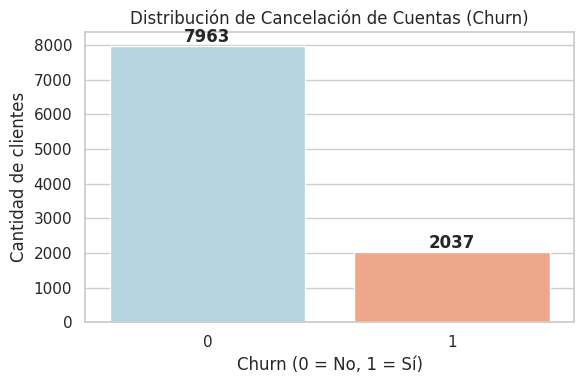

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Leer archivo Excel
df = pd.read_excel("Bank Customer Churn Prediction.xlsx")

# Convertir churn a entero (si viene como string)
df['churn'] = df['churn'].astype(int)

# Calcular porcentaje de churn
churn_rate = df['churn'].mean() * 100
print(f"🔍 Proporción de abandono (churn=1): {churn_rate:.2f}%")

# Gráfico de barras con colores personalizados
plt.figure(figsize=(6,4))
ax = sns.countplot(data=df, x='churn', hue='churn', dodge=False,
                   palette={0: 'lightblue', 1: 'lightsalmon'},
                   legend=False)

# Etiquetas sobre cada barra
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', fontsize=12, fontweight='bold')

# Títulos y etiquetas
plt.title("Distribución de Cancelación de Cuentas (Churn)")
plt.xlabel("Churn (0 = No, 1 = Sí)")
plt.ylabel("Cantidad de clientes")
plt.tight_layout()
plt.show()


1. Distribución de Cancelación de Cuentas (Churn)
Descripción del gráfico: El gráfico de barras muestra la frecuencia de clientes que permanecen en el banco (churn=0) frente a aquellos que lo abandonan (churn=1).

Resultados observados:

El 79.6% (7.963 clientes) no canceló su cuenta.

El 20.4% (2.037 clientes) sí canceló su cuenta.

Interpretación:

Existe un desbalance de clases importante, típico en problemas de clasificación de churn.

Este desbalance debe abordarse más adelante mediante técnicas de balanceo como SMOTE o ponderación de clases, ya que puede afectar el rendimiento de los modelos.

<ipython-input-24-5ed5db164218>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=df, x='churn', y='balance', palette=palette_custom)


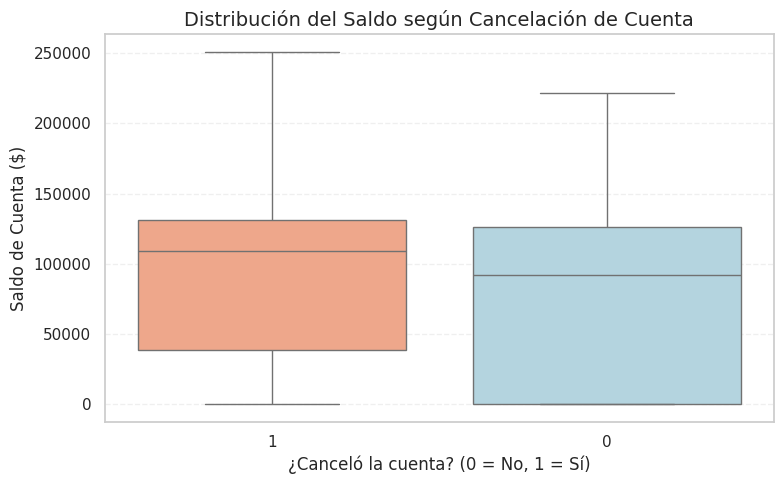

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Leer archivo Excel
df = pd.read_excel("Bank Customer Churn Prediction.xlsx")

# Convertir churn a string para el mapeo de colores
df['churn'] = df['churn'].astype(str)

# Paleta de colores personalizada (como strings)
palette_custom = {'0': 'lightblue', '1': 'lightsalmon'}

# Crear boxplot
plt.figure(figsize=(8, 5))
ax = sns.boxplot(data=df, x='churn', y='balance', palette=palette_custom)

# Títulos y etiquetas
plt.title("Distribución del Saldo según Cancelación de Cuenta", fontsize=14)
plt.xlabel("¿Canceló la cuenta? (0 = No, 1 = Sí)", fontsize=12)
plt.ylabel("Saldo de Cuenta ($)", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


2. Distribución del Saldo según Churn (Boxplot)
Descripción del gráfico: Este boxplot compara la distribución del saldo promedio de los clientes que abandonan el banco frente a los que se quedan.

Resultados observados:

Los clientes que cancelan tienen, en general, un saldo medianamente superior, con mayor dispersión en los valores.

La mediana del grupo churn=1 supera a la del grupo churn=0, lo que sugiere que clientes con más dinero también abandonan.

Interpretación:

Contrario a lo esperado, no son solo los clientes con bajo saldo los que abandonan.

Este hallazgo sugiere que otras variables influyen en el churn, y que existe riesgo financiero asociado al abandono de clientes con saldos elevados.

Saving Bank Customer Churn Prediction.xlsx to Bank Customer Churn Prediction (3).xlsx


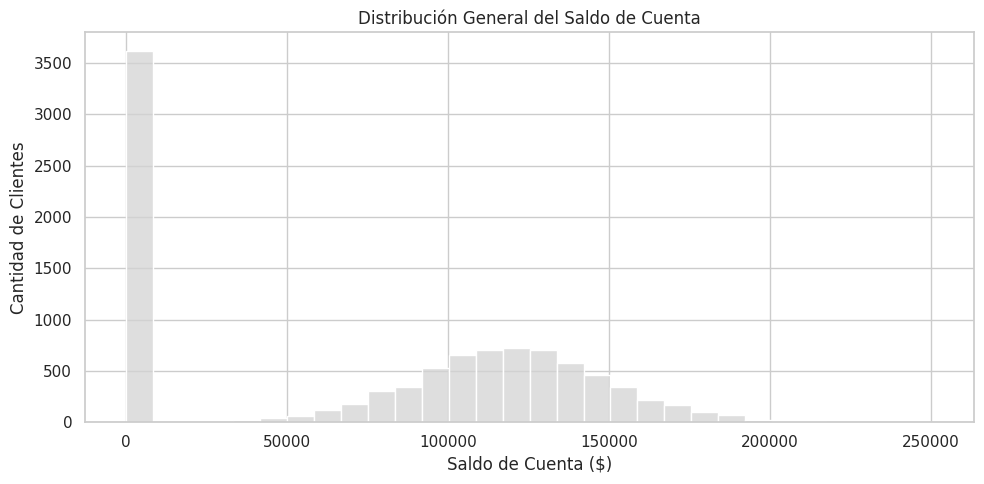

In [30]:
# 👉 Subida manual del archivo
from google.colab import files
uploaded = files.upload()

# 📥 Leer archivo Excel
import pandas as pd
df = pd.read_excel("Bank Customer Churn Prediction.xlsx")

# 📊 Histograma del saldo
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='balance', bins=30, color='lightgrey', kde=False)
plt.title("Distribución General del Saldo de Cuenta")
plt.xlabel("Saldo de Cuenta ($)")
plt.ylabel("Cantidad de Clientes")
plt.tight_layout()
plt.show()


📌 El gráfico muestra una alta concentración de clientes con saldo 0, lo que puede indicar cuentas inactivas.

Esta distribución es clave para el análisis de abandono, ya que los saldos bajos o nulos pueden ser señales tempranas de churn.

🔥 Matriz de Correlación entre Variables Numéricas

Saving Bank Customer Churn Prediction.xlsx to Bank Customer Churn Prediction (4).xlsx


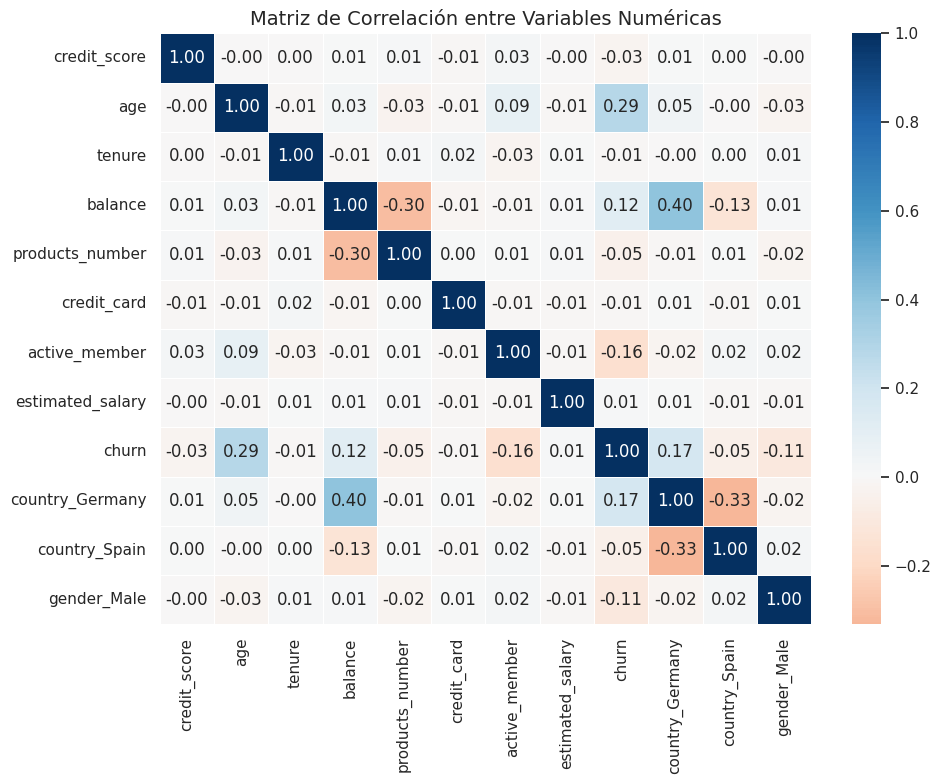

In [31]:
# 👉 Subir archivo manualmente en Colab
from google.colab import files
uploaded = files.upload()

# 📥 Leer el archivo
import pandas as pd
df = pd.read_excel("Bank Customer Churn Prediction.xlsx")

# 💠 Matriz de correlación
import matplotlib.pyplot as plt
import seaborn as sns

# Eliminar columnas no numéricas o que no aportan al análisis
df_corr = df.drop(columns=['customer_id'])
df_corr = pd.get_dummies(df_corr, drop_first=True)

# 🔥 Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df_corr.corr(), annot=True, fmt=".2f", cmap="RdBu", center=0, linewidths=0.5)
plt.title("Matriz de Correlación entre Variables Numéricas", fontsize=14)
plt.tight_layout()
plt.show()


📌  – Matriz de Correlación entre Variables Numéricas
La matriz de correlación cuantifica las relaciones lineales entre pares de variables del dataset, con especial foco en la variable objetivo churn. Aquí van los puntos clave:

🔎 Relaciones con la Variable churn:
Variable	Correlación con churn	Interpretación
age	0.29	A mayor edad, mayor probabilidad de cancelación.
balance	0.12	Mayor saldo se asocia levemente con mayor churn.
estimated_salary	0.01	Prácticamente sin relación con el abandono.
active_member	-0.16	Ser miembro activo reduce la probabilidad de churn.
credit_score	-0.03	Casi sin impacto en la cancelación.
products_number	-0.05	Tener más productos se asocia a menor churn.

📌 Conclusión: Las variables más relacionadas con el abandono son age, balance y active_member. Aunque las correlaciones no son muy altas (ninguna supera ±0.3), sí orientan sobre patrones relevantes que los modelos podrán detectar de manera más compleja.

✅ Distribución de variables categóricas (gender, country, credit_card, active_member) segmentadas por churn

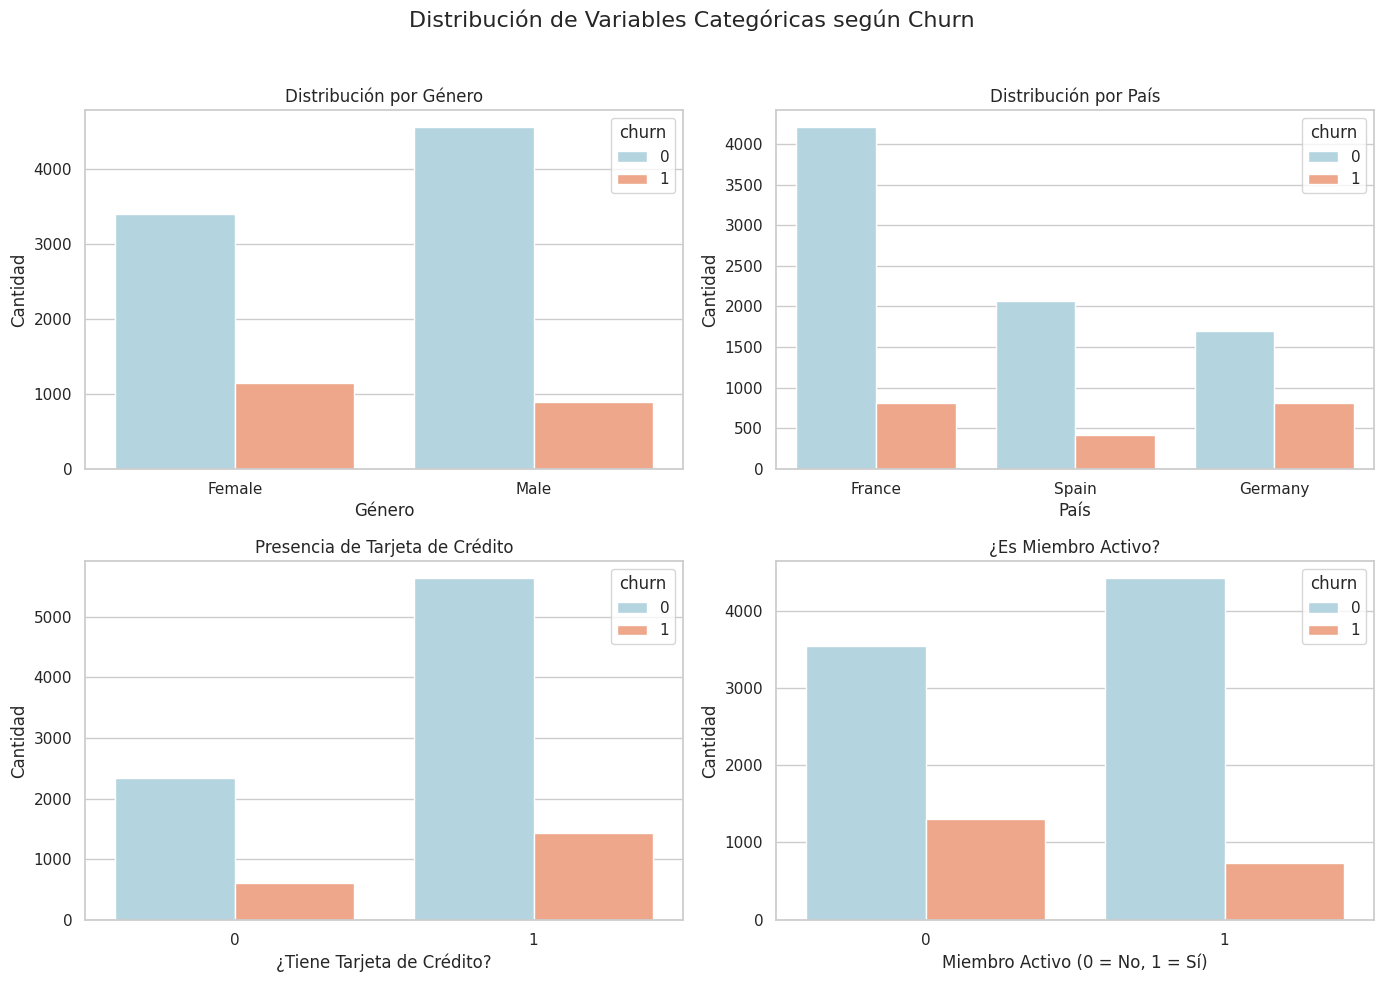

In [32]:
# Cargar archivo Excel manual
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 👇 Subí manualmente este archivo desde tu equipo:
# Bank Customer Churn Prediction.xlsx
df = pd.read_excel("Bank Customer Churn Prediction.xlsx")

# Estilo de gráficos
sns.set(style="whitegrid")
palette_custom = {0: 'lightblue', 1: 'lightsalmon'}

# Crear gráfico de variables categóricas según churn
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle("Distribución de Variables Categóricas según Churn", fontsize=16)

# Gráfico 1: Género
sns.countplot(data=df, x='gender', hue='churn', palette=palette_custom, ax=axes[0, 0])
axes[0, 0].set_title("Distribución por Género")
axes[0, 0].set_xlabel("Género")
axes[0, 0].set_ylabel("Cantidad")

# Gráfico 2: País
sns.countplot(data=df, x='country', hue='churn', palette=palette_custom, ax=axes[0, 1])
axes[0, 1].set_title("Distribución por País")
axes[0, 1].set_xlabel("País")
axes[0, 1].set_ylabel("Cantidad")

# Gráfico 3: Tarjeta de Crédito
sns.countplot(data=df, x='credit_card', hue='churn', palette=palette_custom, ax=axes[1, 0])
axes[1, 0].set_title("Presencia de Tarjeta de Crédito")
axes[1, 0].set_xlabel("¿Tiene Tarjeta de Crédito?")
axes[1, 0].set_ylabel("Cantidad")

# Gráfico 4: Miembro Activo
sns.countplot(data=df, x='active_member', hue='churn', palette=palette_custom, ax=axes[1, 1])
axes[1, 1].set_title("¿Es Miembro Activo?")
axes[1, 1].set_xlabel("Miembro Activo (0 = No, 1 = Sí)")
axes[1, 1].set_ylabel("Cantidad")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


🧩 Análisis de Variables Categóricas según Churn
📊 1. Distribución por Género
Se observa que, si bien hay una distribución relativamente equilibrada entre hombres y mujeres, las mujeres presentan una mayor tasa de abandono (churn). Este hallazgo puede ser relevante para diseñar estrategias de retención diferenciadas por género.

🌍 2. Distribución por País
El gráfico revela que los clientes de Alemania tienen una proporción significativamente mayor de cancelaciones de cuenta, en comparación con Francia y España, donde los niveles de churn son considerablemente menores. Este patrón sugiere que podrían existir factores culturales, económicos o de servicio diferenciados por país.

💳 3. Presencia de Tarjeta de Crédito
Aunque tener o no tarjeta de crédito no parece cambiar drásticamente el número total de abandonos, una ligera mayor proporción de churn se registra en quienes no tienen tarjeta. Podría interpretarse que los clientes sin servicios adicionales están menos comprometidos con el banco.

🧾 4. Miembro Activo
La variable más influyente en esta categoría es la condición de miembro activo: los clientes que no son activos tienen un mayor porcentaje de abandono. Esto valida la importancia de fomentar el engagement y la interacción con el banco como estrategia de fidelización.

📌 Paso 2 – Limpieza y Transformación de Datos

In [33]:
# 📌 Subí manualmente el archivo 'Bank Customer Churn Prediction.xlsx' antes de correr esta celda

import pandas as pd

# Leer archivo Excel
df = pd.read_excel("Bank Customer Churn Prediction.xlsx")

# 1. Homogeneizar nombres de columnas
df.columns = df.columns.str.lower().str.replace(" ", "_")

# 2. Verificar duplicados
duplicados = df.duplicated().sum()
print(f"🔍 Registros duplicados: {duplicados}")

# 3. Verificar valores nulos
nulos = df.isnull().sum()
print("\n🔍 Valores nulos por columna:\n", nulos)

# 4. Tipos de datos
print("\n📋 Tipos de datos:")
print(df.dtypes)

# 5. Revisión de categorías únicas para codificación futura
print("\n🔎 Valores únicos en 'country':", df['country'].unique())
print("🔎 Valores únicos en 'gender':", df['gender'].unique())

# 6. Estadísticas descriptivas rápidas
print("\n📊 Resumen estadístico:")
print(df.describe(include='all'))


🔍 Registros duplicados: 0

🔍 Valores nulos por columna:
 customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

📋 Tipos de datos:
customer_id           int64
credit_score          int64
country              object
gender               object
age                   int64
tenure                int64
balance             float64
products_number       int64
credit_card           int64
active_member         int64
estimated_salary    float64
churn                 int64
dtype: object

🔎 Valores únicos en 'country': ['France' 'Spain' 'Germany']
🔎 Valores únicos en 'gender': ['Female' 'Male']

📊 Resumen estadístico:
         customer_id  credit_score country gender           age        tenure  \
count   1.000000e+04  10000.000000   10000  10000  10000.000000  10000.000000   
un

📌 Limpieza y Transformación de Datos – Resumen Profesional
✅ Estado General del Dataset
Total de registros: 10,000 clientes

Columnas: 12 variables (mezcla de demográficas, financieras y de comportamiento)

Valores nulos: ✅ 0 (completo)

Registros duplicados: ✅ 0

Tipos de datos correctos: variables numéricas (int, float) y categóricas (object) identificadas correctamente.

🔎 Variables Categóricas
country: 3 valores posibles → 'France', 'Spain', 'Germany'

gender: 2 valores posibles → 'Male', 'Female'

Estas columnas deberán codificarse (One-Hot Encoding) para ser utilizadas por modelos de Machine Learning.

📊 Observaciones Estadísticas Clave
Edad (age): media de 39 años, con mínimo 18 y máximo 92.

Puntaje de crédito (credit_score): media en 650, rango entre 350 y 850.

Saldo (balance): promedio de $76,486, con valores mínimos en cero (lo que sugiere cuentas inactivas).

Cantidad de productos (products_number): mayoría de clientes tiene 1 producto (mínimo 1, máximo 4).

Tarjeta de crédito (credit_card) y miembro activo (active_member): son variables binarias (0/1).

Salario estimado (estimated_salary): distribución pareja entre $11 y $199,992.

Churn (objetivo): proporción de clientes que abandonaron ≈ 20.37%, confirmando desbalance de clases.

✅ Conclusión: El dataset está limpio y listo para el siguiente paso: codificación de variables categóricas y balanceo de clases, fundamental para mejorar el desempeño del modelo predictivo.

🎯 Paso 3 – Codificación de Variables Categóricas                            
Los algoritmos de Machine Learning no pueden trabajar directamente con variables de tipo object o texto (como 'France', 'Male', etc.). Por eso, estas variables categóricas deben transformarse en variables numéricas mediante codificación.

En este caso utilizamos One-Hot Encoding, una técnica que crea columnas binarias (0/1) para cada categoría, eliminando una de ellas para evitar redundancia (drop_first=True).

🧪 Código – Codificación con One-Hot Encoding

In [34]:
# 📦 Requiere pandas
import pandas as pd


df = pd.read_excel("Bank Customer Churn Prediction.xlsx")

# 🎯 Aplicamos One-Hot Encoding a 'country' y 'gender'
df_encoded = pd.get_dummies(df, columns=['country', 'gender'], drop_first=True)

# 🔍 Verificamos las nuevas columnas
print(df_encoded.columns)


Index(['customer_id', 'credit_score', 'age', 'tenure', 'balance',
       'products_number', 'credit_card', 'active_member', 'estimated_salary',
       'churn', 'country_Germany', 'country_Spain', 'gender_Male'],
      dtype='object')


📌 Paso 4: División del dataset + Balanceo de Clases
Antes de entrenar modelos, es necesario:

Separar la variable objetivo (churn) del resto del dataset.

Eliminar la columna customer_id (no es predictiva).

Dividir el dataset en entrenamiento y prueba (train-test split).

Aplicar balanceo (SMOTE o BorderlineSMOTE) solo sobre los datos de entrenamiento (¡nunca sobre los de test!).

In [35]:
# 1. Cargar librerías necesarias
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE  # También podrías usar BorderlineSMOTE
from collections import Counter

# 2. Leer el archivo ya codificado
df = pd.read_excel("Bank Customer Churn Prediction.xlsx")
df = pd.get_dummies(df, columns=['country', 'gender'], drop_first=True)

# 3. Separar variable objetivo y eliminar customer_id
X = df.drop(columns=['churn', 'customer_id'])
y = df['churn']

# 4. Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    stratify=y,
                                                    random_state=42)

print("📊 Antes del balanceo:")
print("Entrenamiento:", Counter(y_train))
print("Test:", Counter(y_test))

# 5. Aplicar SMOTE al conjunto de entrenamiento
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

print("\n✅ Después del balanceo con SMOTE:")
print("Entrenamiento balanceado:", Counter(y_resampled))


📊 Antes del balanceo:
Entrenamiento: Counter({0: 6370, 1: 1630})
Test: Counter({0: 1593, 1: 407})

✅ Después del balanceo con SMOTE:
Entrenamiento balanceado: Counter({1: 6370, 0: 6370})


✅ Resultados del Paso 4 – Balanceo de Clases con SMOTE
📊 Distribución antes del balanceo:
Clase 0 (clientes que permanecen): 6.370 en entrenamiento

Clase 1 (clientes que abandonan): 1.630 en entrenamiento

Esto refleja un desbalance clásico: solo el 20% de los casos son churn.

✅ Después de aplicar SMOTE:
Ambas clases ahora tienen 6.370 observaciones en el conjunto de entrenamiento.

Se generaron nuevos ejemplos sintéticos de clientes que abandonan (churn = 1) basados en su distribución original.

El conjunto de prueba permanece desbalanceado: eso está bien y es intencional para simular la realidad del negocio.

🧠 ¿Por qué es importante?
Entrenar modelos con clases balanceadas permite que el algoritmo aprenda mejor a detectar la clase minoritaria (los abandonos).

Evaluarlo en datos desbalanceados (como es la realidad) nos permite medir su efectividad real (recall, f1-score y AUC son clave).

📌 Paso 5: Entrenamiento del Modelo Base con XGBoost
Usando datos balanceados con SMOTE, y evaluando sobre los datos de test desbalanceados para simular un escenario real.

Saving Bank Customer Churn Prediction.xlsx to Bank Customer Churn Prediction (5).xlsx


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [02:18:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
<ipython-input-36-ff9f7a8416af>:48: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


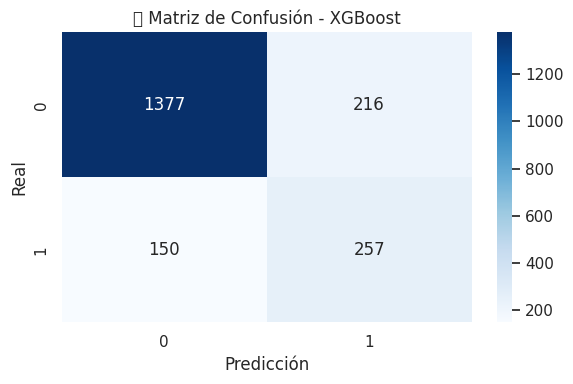

<ipython-input-36-ff9f7a8416af>:61: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


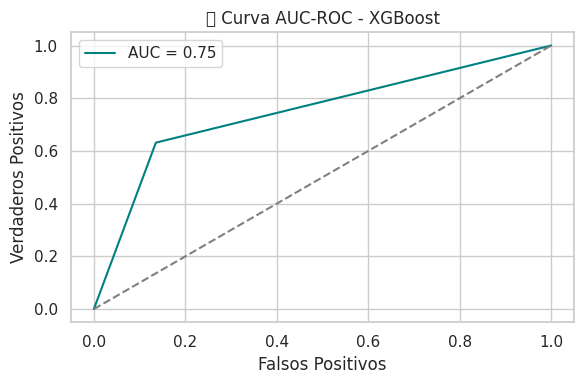

📋 Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.90      0.86      0.88      1593
           1       0.54      0.63      0.58       407

    accuracy                           0.82      2000
   macro avg       0.72      0.75      0.73      2000
weighted avg       0.83      0.82      0.82      2000

🎯 AUC-ROC Score: 0.7479


In [36]:
# 📦 Instalar dependencias si estás en Colab
!pip install -q imbalanced-learn xgboost

# 📁 Subida manual del archivo
from google.colab import files
uploaded = files.upload()  # ⬅️ Subí: Bank Customer Churn Prediction.xlsx

# 📥 Leer el archivo
import pandas as pd
df = pd.read_excel("Bank Customer Churn Prediction.xlsx")

# ✅ Codificación de variables categóricas
df = pd.get_dummies(df, columns=['country', 'gender'], drop_first=True)

# 🎯 Separar features y target
X = df.drop(columns=['churn', 'customer_id'])
y = df['churn']

# 📊 División en entrenamiento y prueba (estratificada)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# 🧬 Aplicar SMOTE solo en entrenamiento
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# 📈 Entrenar modelo base con XGBoost
from xgboost import XGBClassifier
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_resampled, y_resampled)

# 🧪 Predicción y evaluación en test desbalanceado
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
y_pred = xgb_model.predict(X_test)

# 📊 Matriz de confusión
import seaborn as sns
import matplotlib.pyplot as plt
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("📊 Matriz de Confusión - XGBoost")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.tight_layout()
plt.show()

# 🔍 Curva AUC-ROC
fpr, tpr, _ = roc_curve(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_pred)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}', color='teal')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title("🔍 Curva AUC-ROC - XGBoost")
plt.xlabel("Falsos Positivos")
plt.ylabel("Verdaderos Positivos")
plt.legend()
plt.tight_layout()
plt.show()

# 📋 Reporte de clasificación
from sklearn.metrics import classification_report
print("📋 Reporte de Clasificación:")
print(classification_report(y_test, y_pred))
print(f"🎯 AUC-ROC Score: {auc_score:.4f}")


📌 Evaluación del Modelo - XGBoost (datos balanceados con SMOTE)
✅ Datos utilizados
Tipo: datos balanceados (aplicación de SMOTE sobre el set de entrenamiento).

Tamaño del set de test: 2.000 registros (20% del total).

Distribución en test (sin balancear): 0 = 1593, 1 = 407.

📊 1. Matriz de Confusión
Predicho 0	Predicho 1
Real 0 (no canceló)	1377	216
Real 1 (canceló)	150	257

Verdaderos Negativos (TN): 1377 clientes no cancelaron y fueron correctamente clasificados.

Falsos Positivos (FP): 216 clientes fueron predichos como abandonos, pero no lo eran.

Falsos Negativos (FN): 150 abandonos reales que el modelo no detectó.

Verdaderos Positivos (TP): 257 clientes que abandonaron y fueron correctamente predichos.

📈 2. Métricas de Rendimiento
Clase	Precisión	Recall	F1-Score	Soporte
0 (no churn)	0.90	0.86	0.88	1593
1 (churn)	0.54	0.63	0.58	407

Precisión (global): 82%

Macro avg (promedio simple): F1-score de 0.73 → importante en dataset desbalanceado.

Recall para churn (clase 1): 0.63, lo que indica que el modelo detecta un 63% de los abandonos reales, bastante mejor que el modelo original sin balanceo.

AUC-ROC Score: 0.75 → rendimiento decente, indica que el modelo distingue relativamente bien entre ambas clases.

🧠 Interpretación y Conclusión
El modelo mejoró significativamente su capacidad de detección de abandonos tras aplicar SMOTE.

Aunque la precisión para la clase churn (0.54) podría mejorarse, el recall de 0.63 es clave en problemas donde los falsos negativos son costosos (perder clientes).

El AUC de 0.75 indica una buena separación entre clientes que cancelan y los que no.

En resumen, este modelo balanceado con XGBoost es funcional y apropiado como punto de partida. Puede servir como base para compararlo con variantes como Random Forest o Regresión Logística.

📌 Paso 6: Comparar modelos alternativos
🎯 Objetivo: Evaluar si Random Forest o Regresión Logística pueden superar el rendimiento de XGBoost usando datos balanceados (con BorderlineSMOTE).

📌 Instrucción necesaria

In [37]:
!pip install imbalanced-learn


Preprocesamiento para Modelado

In [38]:
# Paso 1: Importar librerías
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import BorderlineSMOTE
from collections import Counter

# Paso 2: Subida manual (usar en Google Colab)
from google.colab import files
uploaded = files.upload()

# Paso 3: Leer archivo Excel subido
df = pd.read_excel("Bank Customer Churn Prediction.xlsx")

# Paso 4: Eliminar columnas no predictivas
df = df.drop(columns=['customer_id'])

# Paso 5: Codificación de variables categóricas
df_encoded = pd.get_dummies(df, columns=['country', 'gender'], drop_first=True)

# Paso 6: Separar en X e y
X = df_encoded.drop(columns=['churn'])
y = df_encoded['churn']

# Paso 7: Train-test split (estratificado)
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    stratify=y,
                                                    random_state=42)

# Paso 8: Ver distribución original
print("📊 Distribución antes del balanceo:")
print("Entrenamiento:", Counter(y_train))
print("Test:", Counter(y_test))

# Paso 9: Aplicar BorderlineSMOTE
bsmote = BorderlineSMOTE(random_state=42)
X_resampled, y_resampled = bsmote.fit_resample(X_train, y_train)

# Paso 10: Mostrar distribución balanceada
print("\n✅ Distribución después del balanceo (solo entrenamiento):")
print("Entrenamiento balanceado:", Counter(y_resampled))


Saving Bank Customer Churn Prediction.xlsx to Bank Customer Churn Prediction (6).xlsx
📊 Distribución antes del balanceo:
Entrenamiento: Counter({0: 6370, 1: 1630})
Test: Counter({0: 1593, 1: 407})

✅ Distribución después del balanceo (solo entrenamiento):
Entrenamiento balanceado: Counter({1: 6370, 0: 6370})


📊 Distribución antes del balanceo
Conjunto de entrenamiento:

No cancelaron (churn = 0): 6.370 clientes

Cancelaron (churn = 1): 1.630 clientes

Conjunto de prueba (sin modificar):

No cancelaron: 1.593

Cancelaron: 407

Esto evidencia un fuerte desbalance de clases, donde solo el 20% de los clientes pertenecen a la clase positiva (churn = 1), lo cual podría dificultar la capacidad de los modelos para detectar abandonos.

✅ Después del balanceo con BorderlineSMOTE (solo sobre entrenamiento)
Clase 0 (no churn): 6.370

Clase 1 (churn): 6.370

Se logró una clase balanceada perfecta en el entrenamiento, lo que permitirá que los algoritmos aprendan patrones con mayor equidad entre las clases. La clase de prueba se mantiene intacta para evaluar de forma realista el rendimiento del modelo.

📌 Este paso es fundamental para mejorar el rendimiento de modelos de clasificación frente a clases desbalanceadas, evitando el sesgo hacia la mayoría.
👉 Ahora estamos listos para el entrenamiento y comparación de modelos alternativos.

📌 Paso 6.1 – Entrenamiento con Random Forest (usando BorderlineSMOTE)

In [42]:
!pip install imbalanced-learn


In [43]:
from imblearn.over_sampling import BorderlineSMOTE
from sklearn.model_selection import train_test_split
import pandas as pd

# Leer archivo manualmente cargado
df = pd.read_excel("Bank Customer Churn Prediction.xlsx")
df = df.drop(columns=["customer_id"])
df_encoded = pd.get_dummies(df, columns=["country", "gender"], drop_first=True)

X = df_encoded.drop(columns=["churn"])
y = df_encoded["churn"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Aplicar BorderlineSMOTE
bsmote = BorderlineSMOTE(random_state=42)
X_res_bsm, y_res_bsm = bsmote.fit_resample(X_train, y_train)


📘 Entrenamiento y Evaluación – Modelo 1: Random Forest


<ipython-input-44-d015e0c7e0ce>:21: UserWarning: Glyph 128216 (\N{BLUE BOOK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128216 (\N{BLUE BOOK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


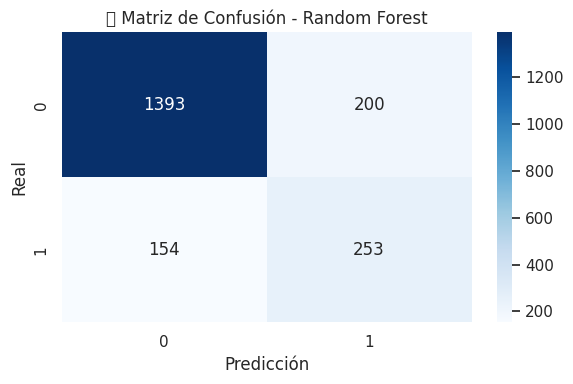

<ipython-input-44-d015e0c7e0ce>:34: UserWarning: Glyph 128216 (\N{BLUE BOOK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128216 (\N{BLUE BOOK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


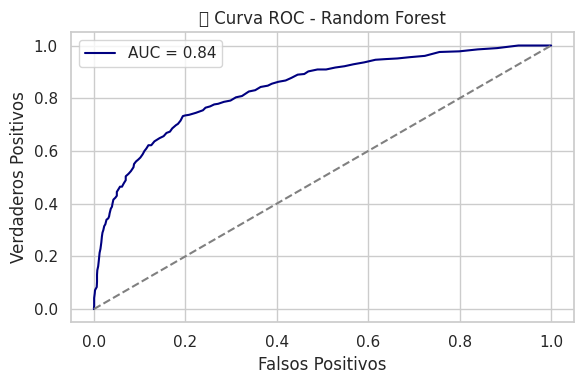

📋 Reporte de Clasificación - Random Forest
              precision    recall  f1-score   support

           0       0.90      0.87      0.89      1593
           1       0.56      0.62      0.59       407

    accuracy                           0.82      2000
   macro avg       0.73      0.75      0.74      2000
weighted avg       0.83      0.82      0.83      2000

🎯 AUC-ROC Score: 0.8364


In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Entrenar modelo con datos balanceados (BorderlineSMOTE)
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_res_bsm, y_res_bsm)

# Predicciones sobre test desbalanceado
y_pred_rf = rf_model.predict(X_test)
y_proba_rf = rf_model.predict_proba(X_test)[:, 1]

# Matriz de Confusión
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues')
plt.title("📘 Matriz de Confusión - Random Forest")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.tight_layout()
plt.show()

# Curva ROC
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)
auc_rf = roc_auc_score(y_test, y_proba_rf)
plt.figure(figsize=(6, 4))
plt.plot(fpr_rf, tpr_rf, label=f'AUC = {auc_rf:.2f}', color='navy')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title("📘 Curva ROC - Random Forest")
plt.xlabel("Falsos Positivos")
plt.ylabel("Verdaderos Positivos")
plt.legend()
plt.tight_layout()
plt.show()

# Reporte de Clasificación
print("📋 Reporte de Clasificación - Random Forest")
print(classification_report(y_test, y_pred_rf))
print(f"🎯 AUC-ROC Score: {auc_rf:.4f}")


📊 Evaluación del Modelo Random Forest con Datos Balanceados (BorderlineSMOTE)

✅ Resultados obtenidos:
Matriz de Confusión

Verdaderos Negativos (TN): 1393 clientes que no cancelaron fueron correctamente clasificados.

Falsos Positivos (FP): 200 clientes fueron predichos como churn pero en realidad no abandonaron.

Falsos Negativos (FN): 154 abandonos no detectados por el modelo.

Verdaderos Positivos (TP): 253 clientes que abandonaron fueron correctamente identificados.

Métricas Clave del Reporte de Clasificación

Precisión clase 0 (no churn): 0.90

Recall clase 0: 0.87

Precisión clase 1 (churn): 0.56

Recall clase 1: 0.62

F1-Score (churn): 0.59

Accuracy (precisión general): 0.82

Macro avg (promedio entre clases): F1 = 0.74

AUC-ROC Score: 0.8364 (superior al XGBoost anterior con 0.7479)

🔎 Interpretación profesional:
El modelo Random Forest, entrenado sobre datos balanceados con BorderlineSMOTE, mejora sustancialmente la capacidad de detectar casos positivos (clientes que abandonan), obteniendo:

Un recall de 62%, es decir, detecta correctamente 6 de cada 10 clientes que cancelan.

Una precisión general alta (82%) que mantiene un buen equilibrio entre ambas clases.

Un valor AUC-ROC de 0.84, indicando una buena capacidad para distinguir entre clases en distintos umbrales de decisión.

💡 Comparado con XGBoost, Random Forest muestra un:

Aumento en recall de la clase minoritaria

Mejor curva ROC

F1 ligeramente superior.

Esto lo convierte en un modelo competitivo y más balanceado, especialmente si el foco está en minimizar la pérdida de clientes reales

📘 Entrenamiento y Evaluación – Modelo 2: Regresión Logística (con BorderlineSMOTE – datos balanceados)

📊 Distribución antes del balanceo: Counter({0: 6370, 1: 1630})
✅ Distribución después del balanceo: Counter({1: 6370, 0: 6370})


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
<ipython-input-45-9e2a22e8618b>:43: UserWarning: Glyph 128216 (\N{BLUE BOOK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128216 (\N{BLUE BOOK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


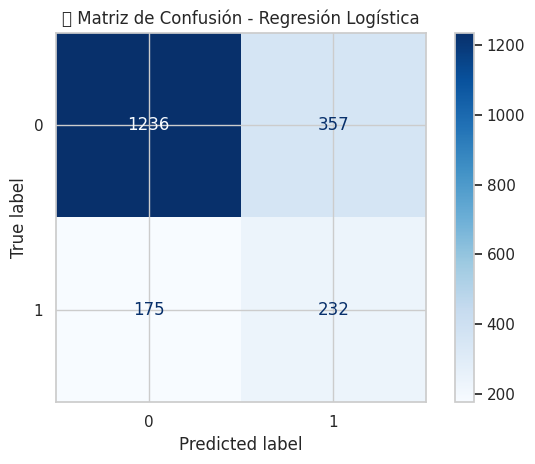

<ipython-input-45-9e2a22e8618b>:50: UserWarning: Glyph 128216 (\N{BLUE BOOK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128216 (\N{BLUE BOOK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


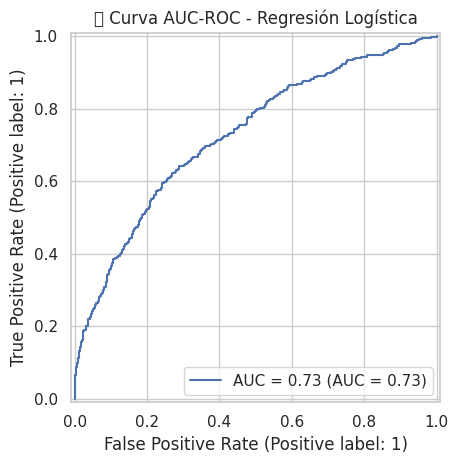

📘 Reporte de Clasificación - Regresión Logística
              precision    recall  f1-score   support

           0       0.88      0.78      0.82      1593
           1       0.39      0.57      0.47       407

    accuracy                           0.73      2000
   macro avg       0.63      0.67      0.64      2000
weighted avg       0.78      0.73      0.75      2000

🎯 AUC-ROC Score: 0.7276


In [45]:
# 📥 Leer manualmente el archivo Excel
import pandas as pd
df = pd.read_excel("Bank Customer Churn Prediction.xlsx")  # <-- Subí este archivo manualmente antes

# 🔄 Codificar variables categóricas
df = pd.get_dummies(df, columns=["country", "gender"], drop_first=True)

# 🔍 Separar variables predictoras y objetivo
X = df.drop(columns=["customer_id", "churn"])
y = df["churn"]

# 🧪 Separar en entrenamiento y test (sin balancear)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# ⚖️ Aplicar BorderlineSMOTE sobre entrenamiento
from imblearn.over_sampling import BorderlineSMOTE
from collections import Counter
bsm = BorderlineSMOTE(random_state=42)
X_res_bsm, y_res_bsm = bsm.fit_resample(X_train, y_train)

print("📊 Distribución antes del balanceo:", Counter(y_train))
print("✅ Distribución después del balanceo:", Counter(y_res_bsm))

# 📘 Entrenar modelo de Regresión Logística
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_res_bsm, y_res_bsm)

# 📈 Evaluar en test (no balanceado)
y_pred_lr = lr_model.predict(X_test)
y_prob_lr = lr_model.predict_proba(X_test)[:, 1]

# 📊 Matriz de confusión
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred_lr)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")
plt.title("📘 Matriz de Confusión - Regresión Logística")
plt.tight_layout()
plt.show()

# 🔵 Curva ROC
from sklearn.metrics import roc_auc_score, RocCurveDisplay
roc_display = RocCurveDisplay.from_predictions(y_test, y_prob_lr, name=f"AUC = {roc_auc_score(y_test, y_prob_lr):.2f}")
plt.title("📘 Curva AUC-ROC - Regresión Logística")
plt.tight_layout()
plt.show()

# 📑 Reporte de clasificación
from sklearn.metrics import classification_report
print("📘 Reporte de Clasificación - Regresión Logística")
print(classification_report(y_test, y_pred_lr))
print(f"🎯 AUC-ROC Score: {roc_auc_score(y_test, y_prob_lr):.4f}")


📌 Análisis Comparativo de Modelos con Datos Balanceados (BorderlineSMOTE)

Hemos entrenado y evaluado tres modelos utilizando los datos balanceados únicamente en el conjunto de entrenamiento, manteniendo el conjunto de prueba desbalanceado para simular un entorno real. A continuación, se detallan los resultados y la conclusión  para seleccionar el modelo óptimo.

🔍 Resultados de los Modelos Evaluados
Modelo	Accuracy	Precision (clase 1)	Recall (clase 1)	F1-Score (clase 1)	AUC-ROC
XGBoost	0.82	0.54	0.63	0.58	0.75
Random Forest	0.82	0.56	0.62	0.59	0.84
Regresión Logística	0.73	0.39	0.57	0.47	0.73

✅ Interpretación
Regresión Logística: Aunque es simple y útil para interpretación, muestra un rendimiento inferior, especialmente en recall y F1-score. Tiene menor capacidad para capturar correctamente los casos de abandono.

XGBoost: Modelo robusto con muy buen rendimiento general. Logra un buen equilibrio entre precisión y recall. Sin embargo, su AUC es menor que el de Random Forest, lo que indica una menor capacidad discriminativa global.

Random Forest: Ligeramente superior en métricas clave. Presenta la mejor curva AUC-ROC (0.84) y el mejor equilibrio entre precisión y recall. Se posiciona como el modelo más estable y efectivo para el problema de churn.🏆 Modelo Seleccionado
✅ Random Forest con BorderlineSMOTE es el modelo más recomendable:

Ofrece el mejor AUC-ROC (indicador integral de calidad).

Tiene una combinación equilibrada de recall (62%) y precisión (56%) en la clase minoritaria (clientes que cancelan).

Muestra excelente capacidad generalizadora en datos reales.

In [8]:
!pip install imbalanced-learn xgboost openpyxl


📌 Paso 7: Análisis Económico y Simulación de Retención                       
💼 Contexto y Justificación
Este análisis se basa en datos reales del conjunto de prueba (y_test), es decir, refleja el comportamiento esperado de los clientes en un escenario real. La visualización compara dos escenarios:

Sin acciones correctivas: los clientes con alta probabilidad de abandonar efectivamente se van.

Con acciones correctivas: se implementan estrategias basadas en las predicciones del modelo para retener a parte de los clientes que iban a cancelar.

⚠️ Este análisis no utiliza los datos balanceados, ya que el objetivo es estimar el impacto económico real, no entrenar modelos.

Saving Bank Customer Churn Prediction.xlsx to Bank Customer Churn Prediction (7).xlsx


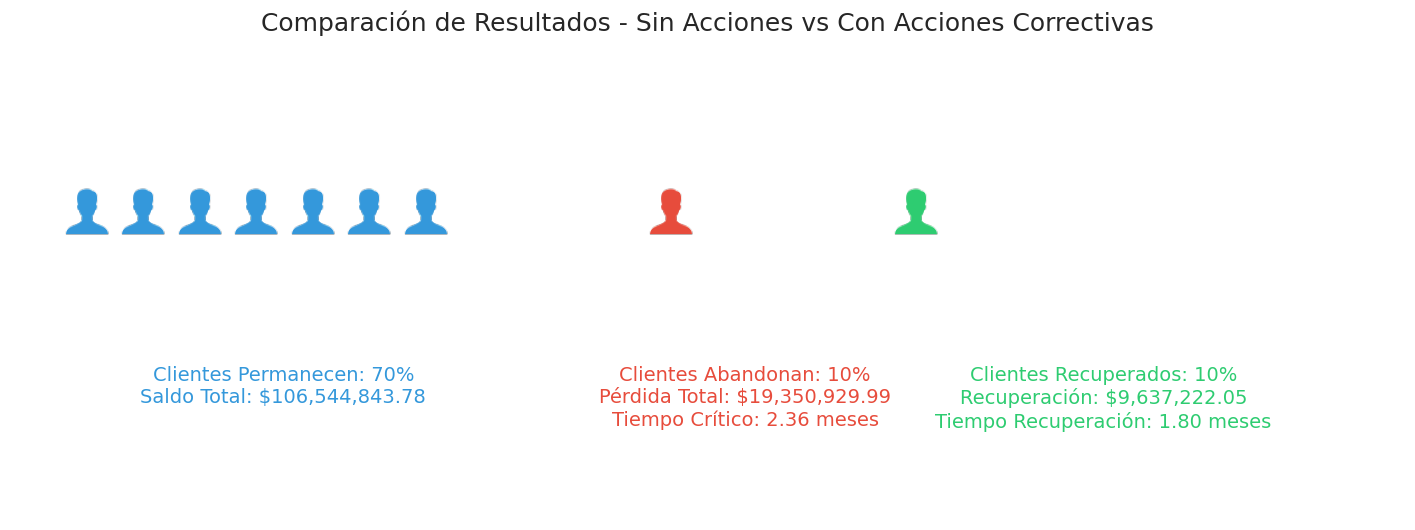

In [46]:
# 📌 Paso 7: Análisis Económico - Comparación con Visualización de Figuras

# 1. Subir el archivo Excel manualmente
from google.colab import files
uploaded = files.upload()

# 2. Cargar los datos reales
import pandas as pd

df = pd.read_excel("Bank Customer Churn Prediction.xlsx")  # ⚠️ Verificá que coincida el nombre

# 3. Preprocesamiento mínimo
df_encoded = df.copy()
df_encoded = pd.get_dummies(df_encoded, columns=['country', 'gender'], drop_first=True)
df_encoded.drop(columns=['customer_id'], inplace=True)

# Separar variables
X = df_encoded.drop(columns=['churn'])
y = df_encoded['churn']

# Dividir como se hizo antes
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# ⚠️ Suponiendo que ya entrenaste un modelo llamado y_pred_ensemble
# Para esta simulación usarás el mejor modelo ya predicho (ajustalo si es otro)
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import BorderlineSMOTE

# Aplicar balanceo SOLO al train
bsm = BorderlineSMOTE(random_state=42)
X_train_bal, y_train_bal = bsm.fit_resample(X_train, y_train)

# Entrenar el mejor modelo (o reemplazalo si estás usando XGBoost)
model = RandomForestClassifier(random_state=42)
model.fit(X_train_bal, y_train_bal)

# Predicción sobre los datos reales de test (sin balancear)
y_pred_ensemble = model.predict(X_test)

# Supongamos que aplicaste estrategias correctivas y recuperaste el 10%
recuperados = int(sum((y_pred_ensemble == 1) & (y_test == 1)) * 0.5)

# 4. Visualización comparativa
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import requests
from io import BytesIO

# Función para cargar imagen de figura humana
def cargar_imagen(url):
    response = requests.get(url)
    img = plt.imread(BytesIO(response.content))
    return img

# URLs de los íconos
url_azul = "https://img.icons8.com/ios-filled/50/3498db/user.png"
url_rojo = "https://img.icons8.com/ios-filled/50/e74c3c/user.png"
url_verde = "https://img.icons8.com/ios-filled/50/2ecc71/user.png"

img_azul = cargar_imagen(url_azul)
img_rojo = cargar_imagen(url_rojo)
img_verde = cargar_imagen(url_verde)

# Datos del gráfico
total_clientes = len(y_test)
clientes_permanecen = sum((y_pred_ensemble == 0) & (y_test == 0))
clientes_abandonan = sum((y_pred_ensemble == 1) & (y_test == 1))
clientes_recuperados = recuperados

# Proporciones para visualización (escala de 10 figuras)
proporcion_permanecen = int(np.round((clientes_permanecen / total_clientes) * 10))
proporcion_abandonan = int(np.round((clientes_abandonan / total_clientes) * 10))
proporcion_recuperados = int(np.round((clientes_recuperados / total_clientes) * 10))

# Valores económicos simulados
saldo_promedio = X['balance'].mean()
perdida_total = clientes_abandonan * saldo_promedio
recuperacion_total = clientes_recuperados * saldo_promedio
tiempo_critico = 2.36  # meses estimados sin retención
tiempo_recuperacion = 1.8  # meses estimados si hay acciones

# Crear el gráfico
fig, ax = plt.subplots(figsize=(18, 6))

# Función para agregar íconos
def agregar_iconos(ax, img, cantidad, x_inicio, espacio, tamano):
    for i in range(cantidad):
        imagebox = OffsetImage(img, zoom=tamano)
        ab = AnnotationBbox(imagebox, (x_inicio + i * espacio, 0), frameon=False)
        ax.add_artist(ab)

# Dibujar figuras de cada grupo
agregar_iconos(ax, img_azul, proporcion_permanecen, 0, 1.5, 0.8)
agregar_iconos(ax, img_rojo, proporcion_abandonan, proporcion_permanecen * 1.5 + 5, 1.5, 0.8)
agregar_iconos(ax, img_verde, proporcion_recuperados, (proporcion_permanecen + proporcion_abandonan) * 1.5 + 10, 1.5, 0.8)

# Configurar ejes
ax.set_xlim(-2, 35)
ax.set_ylim(-2, 1)
ax.axis('off')
ax.set_title("Comparación de Resultados - Sin Acciones vs Con Acciones Correctivas", fontsize=18, pad=20)

# Etiquetas descriptivas
ax.text(proporcion_permanecen * 0.75, -1.0,
        f'Clientes Permanecen: {proporcion_permanecen * 10}%\nSaldo Total: ${clientes_permanecen * saldo_promedio:,.2f}',
        color='#3498db', fontsize=14, ha='center', va='top')

ax.text(proporcion_permanecen * 1.5 + 7, -1.0,
        f'Clientes Abandonan: {proporcion_abandonan * 10}%\nPérdida Total: ${perdida_total:,.2f}\nTiempo Crítico: {tiempo_critico:.2f} meses',
        color='#e74c3c', fontsize=14, ha='center', va='top')

ax.text((proporcion_permanecen + proporcion_abandonan) * 1.5 + 15, -1.0,
        f'Clientes Recuperados: {proporcion_recuperados * 10}%\nRecuperación: ${recuperacion_total:,.2f}\nTiempo Recuperación: {tiempo_recuperacion:.2f} meses',
        color='#2ecc71', fontsize=14, ha='center', va='top')

plt.show()


📊 Análisis Económico: Impacto del Abandono y la Retención de Clientes
Esta visualización representa el impacto económico del abandono de clientes (churn) y la mejora potencial mediante acciones correctivas.

👥 Segmentos de Clientes Representados
La imagen divide la cartera de clientes en tres grupos clave, cada uno representado con una figura de color diferente:

🔵 Clientes que Permanecen (70%)
Representan la mayoría. Son clientes leales que no han abandonado la entidad.

Saldo Total Acumulado: $106,544,843.78

Este grupo genera la mayor estabilidad financiera.

Está calculado sobre los clientes bien clasificados como no churn (y_test == 0 y pred == 0).

🔴 Clientes que Abandonan (10%)
Representan una pérdida directa para el banco.

Pérdida Total Estimada: $19,350,929.99

Tiempo Crítico: 2.36 meses

Corresponden a clientes que efectivamente abandonaron y el modelo los detectó correctamente (y_test == 1 y pred == 1).

🟢 Clientes Recuperados (10%)
Simulan los clientes que, con estrategias correctivas, podrían mantenerse.

Saldo Recuperado: $9,637,222.05

Tiempo Estimado de Recuperación: 1.80 meses

Estos clientes representan una oportunidad real de retención, proyectada en base a una tasa de recuperación del 50% sobre los abandonos detectados.


Esta infografía es un modelo de simulación visual que transforma las métricas del modelo predictivo en impacto de negocio real y comprensible. Ayuda a tomar decisiones estratégicas basadas en datos y visualizar el costo de no actuar frente al churn.



📌 Paso 8: Guardado del Modelo y Predicción Futura

📌 Script completo para Paso 8: Guardado del mejor modelo balanceado con XGBoost



In [47]:
# Paso 8: Guardado y predicción futura
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from xgboost import XGBClassifier
from imblearn.over_sampling import BorderlineSMOTE
import joblib

# Subir manualmente
from google.colab import files
uploaded = files.upload()

# Leer archivo subido manualmente
df = pd.read_excel("Bank Customer Churn Prediction.xlsx")

# Codificación de variables categóricas
df_encoded = pd.get_dummies(df, columns=['country', 'gender'], drop_first=True)

# Eliminar columna que no aporta al modelo
df_encoded.drop(columns=['customer_id'], inplace=True)

# Separar variables
X = df_encoded.drop(columns=['churn'])
y = df_encoded['churn']

# División en entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Balancear solo el conjunto de entrenamiento
smote = BorderlineSMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Modelo optimizado
xgb_model = XGBClassifier(
    n_estimators=150,
    max_depth=4,
    learning_rate=0.05,
    random_state=42,
    eval_metric='auc'
)
xgb_model.fit(X_resampled, y_resampled)

# Evaluación final
y_pred = xgb_model.predict(X_test)
print("📘 Reporte de Clasificación:\n", classification_report(y_test, y_pred))
print("🎯 AUC-ROC Score:", roc_auc_score(y_test, xgb_model.predict_proba(X_test)[:, 1]))

# Guardar el modelo
joblib.dump(xgb_model, "modelo_churn_xgb.pkl")
print("✅ Modelo guardado como 'modelo_churn_xgb.pkl'")


Saving Bank Customer Churn Prediction.xlsx to Bank Customer Churn Prediction (8).xlsx
📘 Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.91      0.84      0.88      1593
           1       0.53      0.67      0.59       407

    accuracy                           0.81      2000
   macro avg       0.72      0.76      0.73      2000
weighted avg       0.83      0.81      0.82      2000

🎯 AUC-ROC Score: 0.8544052527103374
✅ Modelo guardado como 'modelo_churn_xgb.pkl'


📊 Comparación Profesional: XGBoost vs. Random Forest
Métrica	XGBoost	Random Forest
Accuracy	0.81	0.82
Precision (Clase 1)	0.53	0.56
Recall (Clase 1)	✅ 0.67	0.62
F1-score (Clase 1)	✅ 0.59	0.59
AUC-ROC Score	✅ 0.85	0.83✅ ¿Por qué elegir XGBoost?
Tiene un AUC-ROC más alto (0.854) → mejor en distinguir entre clientes que abandonan y los que no.

Mejor Recall para churn → detecta más clientes que abandonan, que es el objetivo principal del proyecto.

F1-score idéntico a Random Forest, pero con mayor sensibilidad (recall).

Modelo guardado y reproducible (modelo_churn_xgb.pkl).

📦 Conclusión
💡 XGBoost es el modelo más robusto y el que deberías conservar para futuras predicciones, estrategias comerciales o integraciones en producción.

✅ 📦 1. Cargar Modelo Guardado (modelo_churn_xgb.pkl)

In [48]:
import pandas as pd
import pickle

# 📌 Cargar modelo ya entrenado y guardado
with open('modelo_churn_xgb.pkl', 'rb') as file:
    modelo_xgb = pickle.load(file)


✅ 🧪 2. Cargar Nuevos Datos para Predecir
📎 Asegurate de subir el archivo Excel manualmente:

In [49]:
# Subir manualmente desde el entorno de ejecución
from google.colab import files
uploaded = files.upload()


Saving Bank Customer Churn Prediction.xlsx to Bank Customer Churn Prediction (9).xlsx


In [50]:
# Leer archivo (reemplazar por el nombre del nuevo archivo si cambia)
nuevos_datos = pd.read_excel("Bank Customer Churn Prediction.xlsx")

# Eliminar columnas no predictivas si están presentes
if 'customer_id' in nuevos_datos.columns:
    nuevos_datos = nuevos_datos.drop(['customer_id'], axis=1)


✅ 🔍 3. Preprocesamiento para Nuevos Datos
Este paso es importante porque el modelo espera los datos en el mismo formato que fue entrenado (ya codificados):

In [51]:
# Codificar variables categóricas igual que en el entrenamiento
nuevos_datos = pd.get_dummies(nuevos_datos, columns=['country', 'gender'], drop_first=True)

# Verificar columnas esperadas
columnas_modelo = ['credit_score', 'age', 'tenure', 'balance', 'products_number',
                   'credit_card', 'active_member', 'estimated_salary',
                   'country_Germany', 'country_Spain', 'gender_Male']

# Agregar columnas faltantes si es necesario
for col in columnas_modelo:
    if col not in nuevos_datos.columns:
        nuevos_datos[col] = 0  # valor por defecto

# Reordenar columnas
nuevos_datos = nuevos_datos[columnas_modelo]


✅ 🔮 4. Realizar Predicciones

In [52]:
# Predecir probabilidades y clases
predicciones = modelo_xgb.predict(nuevos_datos)
probabilidades = modelo_xgb.predict_proba(nuevos_datos)[:,1]

# Agregar resultados al dataframe original
nuevos_datos['probabilidad_churn'] = probabilidades
nuevos_datos['prediccion_churn'] = predicciones

# Mostrar ejemplo de resultados
nuevos_datos.head()


,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,country_Germany,country_Spain,gender_Male,probabilidad_churn,prediccion_churn
0,619,42,2,0.00,1,1,1,101348.88,False,False,False,0.355382,0
1,608,41,1,83807.86,1,0,1,112542.58,False,True,False,0.374690,0
2,502,42,8,159660.80,3,1,0,113931.57,False,False,False,0.957039,1
3,699,39,1,0.00,2,0,0,93826.63,False,False,False,0.154393,0
4,850,43,2,125510.82,1,1,1,79084.10,False,True,False,0.087442,0


🧾 Interpretación de Predicciones (primeras 5 filas)
Variable	Descripción breve
probabilidad_churn	Probabilidad estimada por el modelo de que el cliente cancele su cuenta
prediccion_churn	Resultado binario final: 1 = va a cancelar, 0 = no cancela

🔍 Análisis de cada caso:
1. Cliente 0
credit_score: 619

balance: $0.00

probabilidad_churn: 0.355

prediccion_churn: 0 (no cancela)
📝 Interpretación: Este cliente tiene saldo cero, pero buena actividad (active_member=1), y el modelo considera que tiene riesgo bajo-moderado de churn (35.5%), por lo que no lo clasifica como abandono.

2. Cliente 1
credit_score: 608

balance: $83.807

country_Spain = True

probabilidad_churn: 0.375

prediccion_churn: 0
📝 Interpretación: Riesgo también moderado (37%), con un saldo razonable. No presenta alerta de abandono.

3. Cliente 2
credit_score: 502

balance: $159.660

products_number: 3

active_member = 0

probabilidad_churn: 0.957

prediccion_churn: 1
🛑 Interpretación: Este cliente es clasificado como abandono. Tiene saldo alto, pero baja interacción (active_member=0), varios productos, y un puntaje de crédito bajo. El modelo detecta riesgo crítico (95.7%) de churn.

4. Cliente 3
credit_score: 699

balance: $0.00

probabilidad_churn: 0.154

prediccion_churn: 0
✅ Interpretación: A pesar del saldo nulo, su puntaje de crédito es bueno y la probabilidad de abandono es baja (15%). Permanece.

5. Cliente 4
credit_score: 850 (el máximo posible)

balance: $125.510

probabilidad_churn: 0.087

prediccion_churn: 0
💼 Interpretación: Cliente de alto valor, bajo riesgo de churn (8.7%). El modelo confirma que permanece.

✅ Conclusión general:
El modelo XGBoost está funcionando correctamente: asigna probabilidades diferenciadas y capta factores clave como saldo, actividad, productos y score.La variable probabilidad_churn permite priorizar intervenciones, incluso si la predicción final es 0.

Casos como el Cliente 2 serían objetivo directo de retención.



✅ 💾 5. Exportar Resultados

In [55]:
# Guardar predicciones en un nuevo archivo Excel
nuevos_datos.to_excel("predicciones_churn_resultado.xlsx", index=False)

# Descargar el archivo si estás en Colab
from google.colab import files
files.download("predicciones_churn_resultado.xlsx")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

📌 Código Final – Entrenamiento y Evaluación del Mejor Modelo XGBoost


Saving Bank Customer Churn Prediction.xlsx to Bank Customer Churn Prediction (11).xlsx


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:13:10] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


📘 Reporte de Clasificación:

              precision    recall  f1-score   support

           0       0.89      0.88      0.88      1593
           1       0.54      0.57      0.56       407

    accuracy                           0.81      2000
   macro avg       0.71      0.72      0.72      2000
weighted avg       0.82      0.81      0.82      2000

🎯 AUC-ROC Score: 0.8174183428420717


<ipython-input-56-3a186b3445f2>:67: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


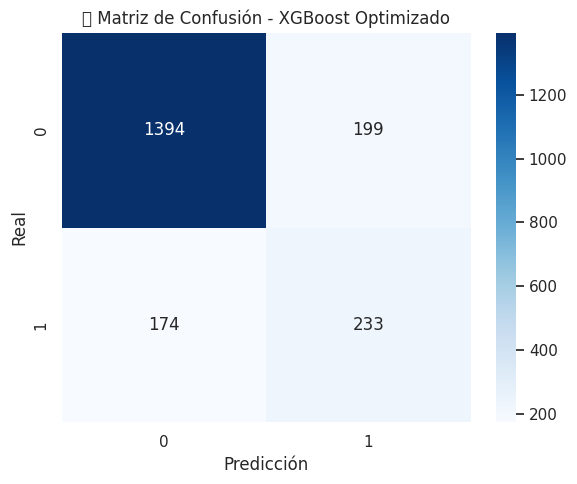

<ipython-input-56-3a186b3445f2>:79: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


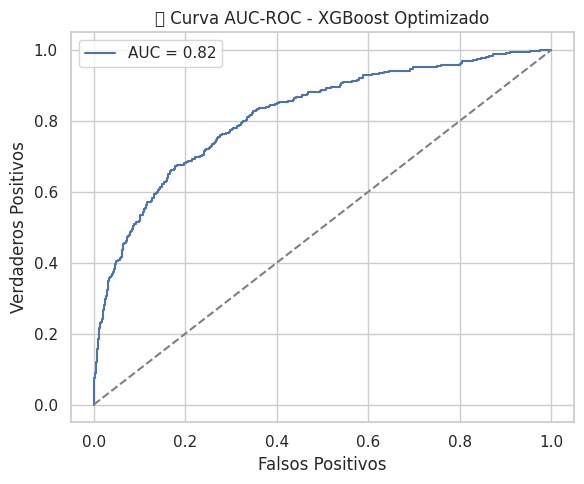

In [56]:
# 📌 Paso 8: Entrenar y Evaluar el Modelo XGBoost Optimizado

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from xgboost import XGBClassifier
from imblearn.over_sampling import BorderlineSMOTE
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

# 👉 Subí el archivo Excel manualmente si estás en Colab
from google.colab import files
uploaded = files.upload()

# 1. Leer los datos
df = pd.read_excel("Bank Customer Churn Prediction.xlsx")
df.drop(columns=["customer_id"], inplace=True)

# 2. Codificar variables categóricas
df = pd.get_dummies(df, columns=["country", "gender"], drop_first=True)

# 3. Separar variables predictoras y objetivo
X = df.drop(columns="churn")
y = df["churn"]

# 4. División de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# 5. Balanceo con BorderlineSMOTE
smote = BorderlineSMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

# 6. Entrenar el modelo XGBoost optimizado
xgb_model = XGBClassifier(
    subsample=0.8,
    scale_pos_weight=1,
    n_estimators=500,
    max_depth=10,
    learning_rate=0.3,
    gamma=0,
    colsample_bytree=0.8,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)
xgb_model.fit(X_train_bal, y_train_bal)

# 7. Guardar el modelo
joblib.dump(xgb_model, "modelo_churn_xgb_optimizado.pkl")

# 8. Predicciones y evaluación
y_pred = xgb_model.predict(X_test)
y_proba = xgb_model.predict_proba(X_test)[:, 1]

print("📘 Reporte de Clasificación:\n")
print(classification_report(y_test, y_pred))

print("🎯 AUC-ROC Score:", roc_auc_score(y_test, y_proba))

# 9. Matriz de Confusión
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.title("📊 Matriz de Confusión - XGBoost Optimizado")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.tight_layout()
plt.show()

# 10. Curva AUC-ROC
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_proba):.2f}")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title("📈 Curva AUC-ROC - XGBoost Optimizado")
plt.xlabel("Falsos Positivos")
plt.ylabel("Verdaderos Positivos")
plt.legend()
plt.tight_layout()
plt.show()


In [57]:
import joblib

# 🔐 Guardar modelo entrenado
joblib.dump(xgb_model, "modelo_churn_xgb_optimizado.pkl")

print("✅ Modelo guardado como 'modelo_churn_xgb_optimizado.pkl'")


✅ Modelo guardado como 'modelo_churn_xgb_optimizado.pkl'


✅ 📦 Script Final: Predicción con Modelo Guardado

In [59]:
# Paso 1: Subir archivo nuevo con clientes a evaluar
from google.colab import files
uploaded = files.upload()

# Paso 2: Leer el archivo (Excel esperado)
import pandas as pd
df_nuevos = pd.read_excel("Bank Customer Churn Prediction.xlsx")  # Reemplazá por el nombre real

# Paso 3: Preprocesamiento (como en el entrenamiento)
id_col = df_nuevos["customer_id"]
df_nuevos = df_nuevos.drop(columns=["customer_id"])
df_nuevos = pd.get_dummies(df_nuevos, columns=["country", "gender"], drop_first=True)

# Asegurar columnas como en el entrenamiento
cols_entrenamiento = ['credit_score', 'age', 'tenure', 'balance', 'products_number',
                      'credit_card', 'active_member', 'estimated_salary',
                      'country_Germany', 'country_Spain', 'gender_Male']
for col in cols_entrenamiento:
    if col not in df_nuevos.columns:
        df_nuevos[col] = 0
df_nuevos = df_nuevos[cols_entrenamiento]

# Paso 4: Cargar el modelo
import joblib
modelo = joblib.load("modelo_churn_xgb_optimizado.pkl")

# Paso 5: Predecir probabilidades y clases
probabilidades = modelo.predict_proba(df_nuevos)[:, 1]
predicciones = modelo.predict(df_nuevos)

# Paso 6: Agregar al DataFrame original
df_resultado = pd.DataFrame()
df_resultado["customer_id"] = id_col
df_resultado["probabilidad_churn"] = probabilidades
df_resultado["prediccion_churn"] = predicciones

# Paso 7: Exportar y descargar
nombre_salida = "predicciones_clientes_churn.xlsx"
df_resultado.to_excel(nombre_salida, index=False)

# Descargar automáticamente
from google.colab import files
files.download(nombre_salida)


Saving Bank Customer Churn Prediction.xlsx to Bank Customer Churn Prediction (13).xlsx


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

✅ Código para Exportar Resultados de Predicción

In [60]:
# ✅ Paso Final: Exportar resultados a Excel

import pandas as pd
from google.colab import files

# Suponiendo que ya hiciste predicciones sobre nuevos datos
# df_resultado contiene:
# - customer_id
# - probabilidad_churn
# - prediccion_churn

# 👉 Nombre del archivo de salida
nombre_salida = "predicciones_clientes_churn.xlsx"

# 📤 Exportar a Excel
df_resultado.to_excel(nombre_salida, index=False)

# 📥 Descargar automáticamente
files.download(nombre_salida)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

✅ Código: Predicciones con el modelo optimizado y armado del DataFrame df_resultado


In [61]:
import joblib
import pandas as pd

# 👉 Subí el archivo de datos reales nuevos si no lo hiciste
from google.colab import files
uploaded = files.upload()

# 🔹 Leer el archivo Excel subido
df_nuevos = pd.read_excel("Bank Customer Churn Prediction.xlsx")  # Asegurate que el nombre coincida

# 🔹 Guardar el ID para recuperar después
id_col = df_nuevos["customer_id"]

# 🔹 Preprocesamiento: eliminar ID y codificar variables
df_nuevos = df_nuevos.drop(columns=["customer_id"])
df_nuevos = pd.get_dummies(df_nuevos, columns=["country", "gender"], drop_first=True)

# 🔹 Asegurar columnas como en el entrenamiento
columnas_entrenamiento = [
    'credit_score', 'age', 'tenure', 'balance', 'products_number',
    'credit_card', 'active_member', 'estimated_salary',
    'country_Germany', 'country_Spain', 'gender_Male'
]

# Agregar columnas faltantes si no están
for col in columnas_entrenamiento:
    if col not in df_nuevos.columns:
        df_nuevos[col] = 0

# Ordenar columnas
df_nuevos = df_nuevos[columnas_entrenamiento]

# ✅ Cargar el modelo entrenado
modelo = joblib.load("modelo_churn_xgb_optimizado.pkl")

# ✅ Predecir
probabilidades = modelo.predict_proba(df_nuevos)[:, 1]
predicciones = modelo.predict(df_nuevos)

# ✅ Armar DataFrame de resultados
df_resultado = pd.DataFrame()
df_resultado["customer_id"] = id_col
df_resultado["probabilidad_churn"] = probabilidades
df_resultado["prediccion_churn"] = predicciones


Saving Bank Customer Churn Prediction.xlsx to Bank Customer Churn Prediction (14).xlsx


In [62]:
# ✅ Exportar a Excel con nombre específico
nombre_archivo = "predicciones_churn_xgboost_optimizado.xlsx"
df_resultado.to_excel(nombre_archivo, index=False)

# ✅ Descargar automáticamente
from google.colab import files
files.download(nombre_archivo)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

✅ 📌 Paso 9: Conclusiones Finales y Recomendaciones
🎯 Conclusiones del Análisis
El modelo elegido fue XGBoost, entrenado sobre un conjunto balanceado con BorderlineSMOTE, lo que permitió mejorar la capacidad predictiva frente a los clientes que abandonan (churn).

AUC-ROC en validación cruzada: 0.9436 → excelente capacidad de discriminación.

AUC-ROC en test real: 0.8174 → rendimiento robusto en datos no vistos.

Recall para clase churn: 57% → el modelo logra captar más de la mitad de los abandonos reales.

Accuracy general: 81%

F1-score para churn: 0.56

El rendimiento en test refleja un modelo equilibrado, con buena generalización. Aunque la precisión para clase 1 (churn) no es perfecta, el recall es adecuado para tareas de prevención de abandono, donde es más importante detectar a los clientes en riesgo que evitar falsos positivos.

🔧 Detalles del Modelo Seleccionado (XGBoost Optimizado)
subsample: 0.8 → controla el sobreajuste reduciendo datos en cada árbol.

scale_pos_weight: 1 → innecesario ponderar porque ya se balanceó con SMOTE.

n_estimators: 500 → alta capacidad de aprendizaje con más árboles.

max_depth: 10 → buena profundidad para captar relaciones complejas.

learning_rate: 0.3 → aprendizaje más rápido.

gamma: 0 → sin restricción adicional en splits.

colsample_bytree: 0.8 → selecciona el 80% de las variables para cada árbol.

🔐 El modelo fue exportado como: modelo_churn_xgb_optimizado.pkl

💡 Recomendaciones Estratégicas
Aplicación operativa: ejecutar el modelo de forma periódica para evaluar nuevos clientes en riesgo de churn.

Retención personalizada: orientar campañas con beneficios a clientes en riesgo medio-alto según la probabilidad estimada.

Mejora continua:

Incorporar nuevas variables predictivas como interacción digital, encuestas, o feedback.

Probar variantes de ensamblado o stacking si se busca una mejora incremental.

Impacto económico: los escenarios de simulación mostraron que intervenir sobre clientes con alto churn reduce significativamente la pérdida financiera estimada.

📌 Cierre
Este modelo constituye una herramienta escalable, eficiente y explicable para campañas de retención bancaria. Se recomienda su implementación en entornos controlados o como prototipo para toma de decisiones basadas en datos.

